> Installation of the required library:
```bash
    pip install -r requirements.txt
```


### __Question 1:__

##### Write a program using Python to convert the color image (RGB) to gray image. (Use ratios 0.28:0.59:0.10)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

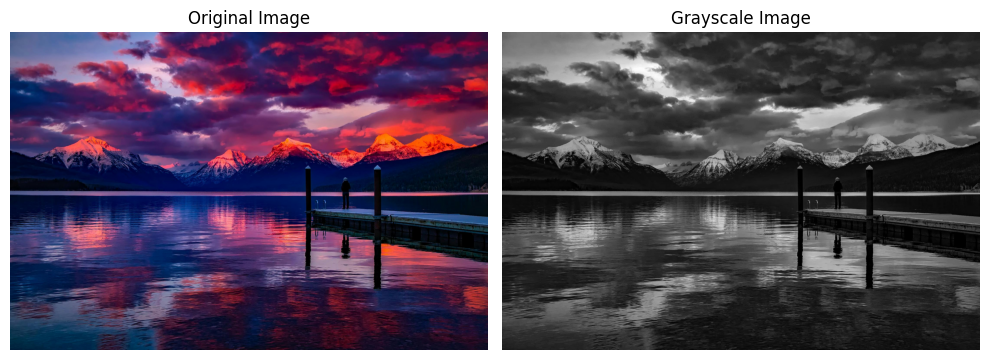

In [3]:
def rgb_to_gray(image):
    image = Image.open(image)
    image_array = np.array(image)

    r, g, b = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]

    grayscale = 0.28 * r + 0.59 * g + 0.10 * b
    grayscale_image = grayscale.astype(np.uint8)


    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image_array)
    plt.axis("off")

    plt.subplot(1,2, 2)
    plt.title("Grayscale Image")
    #this cmap gray is used so that imshow does not apply default color "virdis"
    plt.imshow(grayscale_image, cmap="gray")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
    return grayscale_image


input_image = './image.jpg'

gray_image = rgb_to_gray(input_image)




### __Question 2:__

##### Given an image, perform the following operations to it accordingly:
1. Add salt-pepper noise to it.
2. Perform mean filter to the noisy image.
3. Perform Gaussian filter to the noisy image.

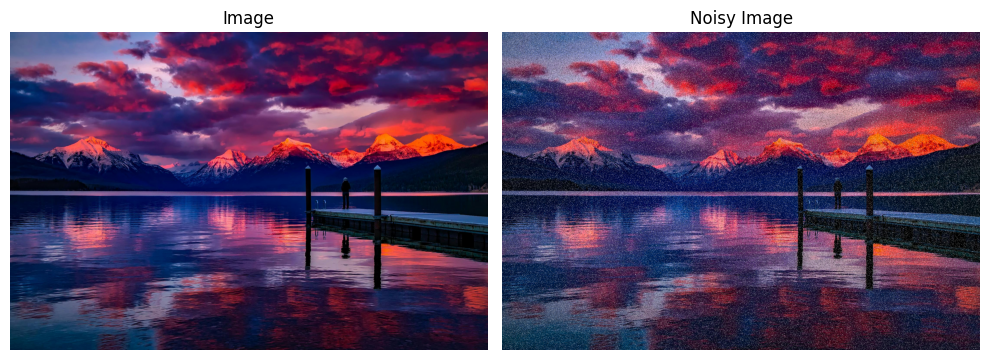

In [12]:

# Add salt-and-pepper noise
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    image = Image.open(image)
    image = np.array(image)
    noisy_image = np.copy(image)
    total_pixels = image.size
    
    # Number of salt and pepper pixels
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)
    
    # Add salt noise (white pixels)
    coords_salt = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy_image[coords_salt[0], coords_salt[1]] = 255  # Assuming 8-bit grayscale
    
    # Add pepper noise (black pixels)
    coords_pepper = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy_image[coords_pepper[0], coords_pepper[1]] = 0
    
    return noisy_image




salt_prob = 0.02
pepper_prob = 0.02
 
salt_image = add_salt_pepper_noise(input_image, salt_prob, pepper_prob)

image = Image.open(input_image)
image_arr = np.array(image)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Image")
plt.imshow(image_arr)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Noisy Image")
plt.imshow(salt_image)
plt.axis("off")

plt.tight_layout()
plt.show()

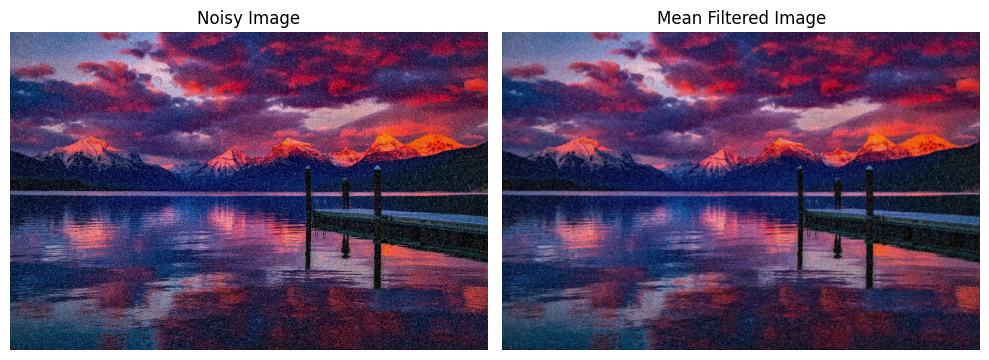

In [13]:
def mean_filter(image, kernel_size = 3):
    # Dimensions of the image
    # Get dimensions
    height, width, channels = image.shape
    
    # Padding size
    pad = kernel_size // 2
    
    # Initialize the output image
    blurred_image = np.zeros_like(image, dtype=np.uint8)
    
    # Apply mean filter to each channel separately
    for c in range(channels):
        # Pad the current channel
        padded_channel = np.zeros((height + 2 * pad, width + 2 * pad))
        padded_channel[pad:pad + height, pad:pad + width] = image[:, :, c]
        
        # Create a blurred version of the current channel
        for i in range(height):
            for j in range(width):
                # Extract the kernel region
                kernel_region = padded_channel[i:i + kernel_size, j:j + kernel_size]
                
                # Compute the mean of the kernel region
                kernel_mean = np.sum(kernel_region) / (kernel_size * kernel_size)
                
                # Assign the mean value to the output image
                blurred_image[i, j, c] = kernel_mean
    
    return blurred_image

blurred_image = mean_filter(salt_image, kernel_size=5)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Noisy Image")
plt.imshow(salt_image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Mean Filtered Image")
plt.imshow(blurred_image)
plt.axis("off")

plt.tight_layout()
plt.show()

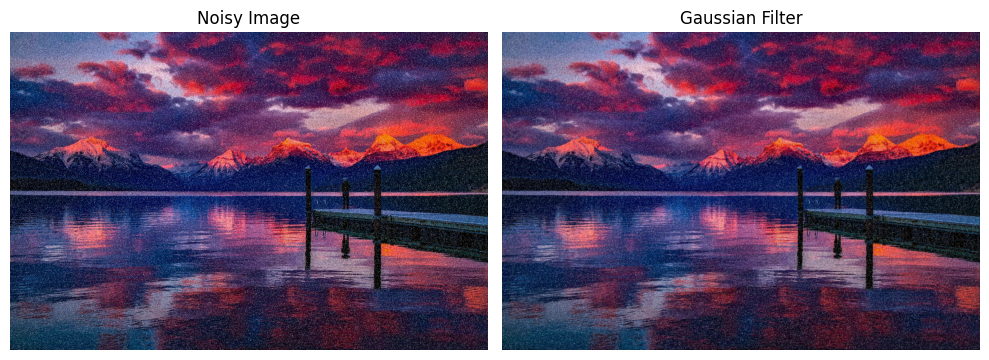

In [14]:
#creation of gaussian_kernel
def gaussian_kernel(size, sigma=1):
    """
    Generate a Gaussian kernel.
    :param size: The size of the kernel (must be odd, e.g., 3, 5, 7).
    :param sigma: The standard deviation of the Gaussian distribution.
    :return: A 2D Gaussian kernel as a NumPy array.
    """
    # Create a 1D Gaussian kernel
    kernel_1d = np.linspace(-size//2, size//2, size)
    kernel_1d = np.exp(-0.5 * (kernel_1d / sigma) ** 2)
    
    # Normalize the kernel so that the sum of all values equals 1
    kernel_1d /= np.sum(kernel_1d)
    
    # Create a 2D kernel by taking the outer product of the 1D kernel with itself
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    
    # Normalize the 2D kernel (this is just a safeguard, should already sum to 1)
    kernel_2d /= np.sum(kernel_2d)
    
    return kernel_2d

def gaussian_blur_color(image, kernel_size=5, sigma=1):
    """
    Apply Gaussian blur to a color image using a Gaussian kernel.
    
    :param image: The input color image (3D NumPy array with shape (height, width, channels)).
    :param kernel_size: Size of the Gaussian kernel (must be odd, e.g., 3, 5, 7).
    :param sigma: The standard deviation of the Gaussian distribution.
    :return: The blurred color image (3D NumPy array).
    """
    
    
    # Ensure the input image has 3 dimensions (color image)
    if len(image.shape) != 3 or image.shape[2] not in [3, 4]:  # Check for RGB or RGBA
        raise ValueError("Input image must be a color image with 3 or 4 channels (e.g., RGB or RGBA).")
    
    # Generate the Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)
    
    # Get image dimensions
    height, width, channels = image.shape
    
    # Pad size
    pad = kernel_size // 2
    
    # Initialize output image
    blurred_image = np.zeros_like(image, dtype=np.uint8)
    
    # Apply Gaussian blur to each channel separately
    for c in range(channels):
        # Extract a single channel
        channel = image[:, :, c]
        
        # Pad the channel
        padded_channel = np.pad(channel, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
        
        # Create a blurred version of the current channel
        for i in range(height):
            for j in range(width):
                # Extract the region around the current pixel
                region = padded_channel[i:i + kernel_size, j:j + kernel_size]
                
                # Apply the Gaussian kernel (convolution operation)
                blurred_image[i, j, c] = np.sum(region * kernel)
    
    return blurred_image

kernel_size = 5  # You can adjust this size (3x3, 5x5, etc.)
sigma = 1  # Standard deviation of the Gaussian distribution
blurred_image = gaussian_blur_color(salt_image, kernel_size, sigma)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Noisy Image")
plt.imshow(salt_image, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Gaussian Filter")
plt.imshow(blurred_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
